<a href="https://colab.research.google.com/github/reddotinmotion/MxN-tic-tac-toe-player/blob/main/AFAD_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.2.7
!pip install fastcore==1.3.19

In [3]:
from fastai.data.all import *
from fastai.vision.all import *

In [4]:
!git clone https://github.com/afad-dataset/tarball.git

# Here we construct the whole tarball from a list of smaller tarballs.
!echo 'Reconstructing AFAD-Full.tar.xz from smaller tarballs.'
!cat tarball/AFAD-Full.tar.xz* > AFAD-Full.tar.xz

# We no longer need our smaller tarballs so we delete them.
!echo 'Removing smaller tarballs from disk.'
!rm -rf tarball

# We extract the contents of our reconstructed tarball.
!echo 'Extracting contents of AFAD-Full.tar.xz.'
!tar -xf AFAD-Full.tar.xz

!echo 'Removing AFAD-Full.tar.xz from disk.'
# WE no longer need our reconstructed tarball so we delete it. 
!rm AFAD-Full.tar.xz

Cloning into 'tarball'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (55/55), done.
Checking out files: 100% (48/48), done.
Reconstructing AFAD-Full.tar.xz from smaller tarballs.
Removing smaller tarballs from disk.
Extracting contents of AFAD-Full.tar.xz.
Removing AFAD-Full.tar.xz from disk.


In [5]:
def grand_parent_label(o):
    "Label `item` with the grand parent folder name."
    return Path(o).parent.parent.name

In [6]:
import os
ages = os.listdir('AFAD-Full')
print(ages)

['62', '55', '56', '38', '39', '70', '74', '23', '47', '16', '24', '59', '72', '53', '51', '17', '41', '19', '69', '20', '49', '27', '42', '29', '26', '57', '48', '21', '71', '34', '73', '28', '63', '22', '43', '54', '67', '75', '50', '45', '58', '52', '65', '60', '68', '61', '15', '31', '30', '33', 'README.md', 'AFAD-Full.txt', '25', '37', '35', '46', '44', '64', '18', '66', '36', '32', '40']


In [7]:
faces = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 29),
    get_y = grand_parent_label,
    item_tfms = Resize(128)
)

In [8]:
path = Path('AFAD-Full')
file_names = get_image_files(path)
file_names

(#165501) [Path('AFAD-Full/62/111/854661-0.jpg'),Path('AFAD-Full/62/111/858053-0.jpg'),Path('AFAD-Full/62/111/854703-1.jpg'),Path('AFAD-Full/62/111/854668-0.jpg'),Path('AFAD-Full/62/111/854674-0.jpg'),Path('AFAD-Full/62/111/854658-0.jpg'),Path('AFAD-Full/62/111/854655-1.jpg'),Path('AFAD-Full/62/111/854689-1.jpg'),Path('AFAD-Full/62/111/854666-0.jpg'),Path('AFAD-Full/62/111/854706-0.jpg')...]

In [9]:
failed_files = verify_images(file_names)
failed_files

(#0) []

In [10]:
dataloaders = faces.dataloaders(path)

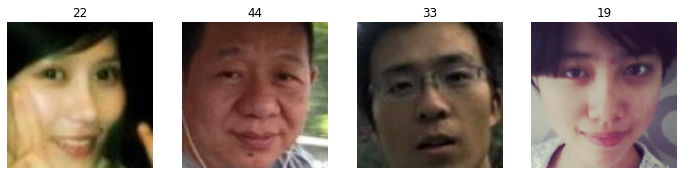

In [11]:
dataloaders.valid.show_batch(max_n = 4, nrows=1)